# Explore here

In [10]:
# Your code here

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter=',')
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Exploración y limpieza de datos

# Obtener las dimensiones

total_data.shape

(1338, 7)

In [12]:
# Obtener información sobre tipos de datos y valores no nulos

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Buscar duplicados

total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Buscar valores nulos 

total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# Escalado de valores 

from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

num_variables = ["age", "sex_n", "bmi", 
                 "children", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()

transformed_data = scaler.fit_transform(total_data[num_variables])
df_scaler = pd.DataFrame(transformed_data, index=total_data.index, columns=num_variables)
df_scaler.head()

,age,sex_n,bmi,children,smoker_n,region_n,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


In [23]:
# Selección de características

# División train vs test 

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scaler.drop("charges", axis = 1)
y = df_scaler["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,sex_n,bmi,children,smoker_n
0,0.108696,1.0,0.230024,0.0,1.0
1,0.065217,1.0,0.263250,0.4,1.0
2,0.739130,0.0,0.580172,0.4,1.0
3,0.978261,1.0,0.686306,0.0,1.0
4,0.630435,0.0,0.286252,0.4,1.0


In [24]:
X_test_sel.head()

,age,sex_n,bmi,children,smoker_n
0,0.673913,1.0,0.176352,0.0,1.0
1,0.239130,0.0,0.259349,0.8,1.0
2,0.717391,0.0,0.549502,0.6,1.0
3,0.282609,1.0,0.495830,0.6,0.0
4,0.282609,1.0,0.603444,0.4,1.0


In [25]:
# Guardado de data limpia

X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [26]:
# Regresión Lineal 

# Paso 1: lectura del conjunto de datos procesado 

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,sex_n,bmi,children,smoker_n,charges
0,0.108696,1.0,0.230024,0.0,1.0,0.020339
1,0.065217,1.0,0.263250,0.4,1.0,0.034446
2,0.739130,0.0,0.580172,0.4,1.0,0.516374
3,0.978261,1.0,0.686306,0.0,1.0,0.196070
4,0.630435,0.0,0.286252,0.4,1.0,0.137177


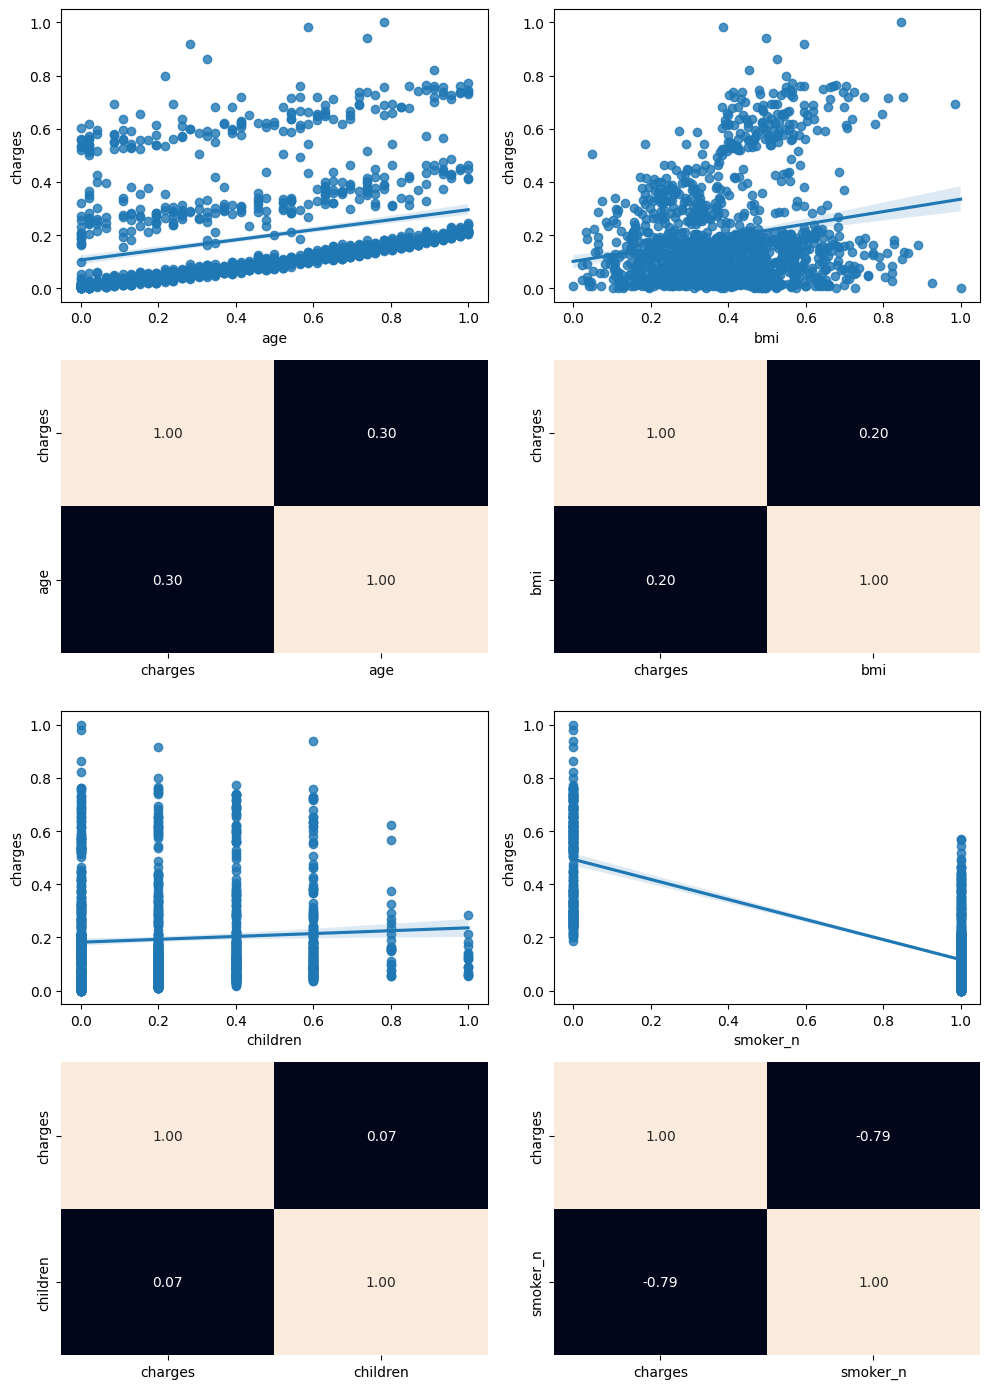

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [29]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 0.32035019525468766
Coeficientes (b): [ 0.18289935 -0.00135721  0.18131339  0.04293502 -0.36794733]


In [32]:
y_pred = model.predict(X_test)
y_pred

array([ 1.06278880e-01,  7.75111183e-02,  2.09006406e-01,  4.86343560e-01,
        1.29321026e-01,  1.96597743e-01,  4.58426905e-01,  8.98925865e-03,
        1.56389743e-01,  1.62161230e-01,  1.48397883e-01,  5.09788093e-01,
        4.69438384e-01,  2.60151710e-01,  1.45143530e-01,  1.37718714e-01,
        5.07050721e-02,  4.93001056e-01,  3.77835811e-02,  7.12131265e-02,
        4.34752752e-02,  4.58001767e-01,  2.23173949e-01,  4.71271422e-01,
        4.75452764e-01,  6.76984638e-02,  5.52020704e-01,  5.68132723e-01,
        1.56539344e-01,  2.00600742e-01,  7.77732443e-02,  1.89840514e-01,
       -4.46562665e-03,  1.78943192e-01,  6.16900337e-01,  1.81174078e-01,
        6.09712422e-02,  4.53397717e-02,  4.82252611e-01,  1.31294323e-01,
        8.46218686e-02,  4.56852449e-01,  5.41763595e-01,  1.70548767e-01,
        1.00369934e-01,  4.01626205e-02,  7.10346032e-02,  1.28390311e-01,
        4.94081474e-02,  1.31618014e-01,  9.24578657e-02,  1.64760058e-01,
        4.73752733e-01,  

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.009147354269134718
Coeficiente de determinación: 0.8046218811772661


No se puede optimizar, ya que no hay hiperparámetros